# <center>Аналитическое решение с помощью NumPy</center>

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
plt.style.use('seaborn')
warnings.filterwarnings('ignore')

In [21]:
from sklearn.datasets import load_boston 
boston = load_boston()
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [22]:
boston_data = pd.DataFrame(
    data=boston['data'],
    columns=boston['feature_names']
)
boston_data['MEDV'] = boston['target']
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [23]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


> Модель линейной регрессии требует, чтобы в подаваемых ей на вход данных не было пропущенных значений. Также модель не умеет работать с категориальными признаками, представленными в виде типа object. Прежде чем подавать в модель линейной регрессии категориальные признаки, необходимо произвести кодировку категорий с помощью уже знакомых вам методов кодирования.



## Линейная регрессия на одном признаке

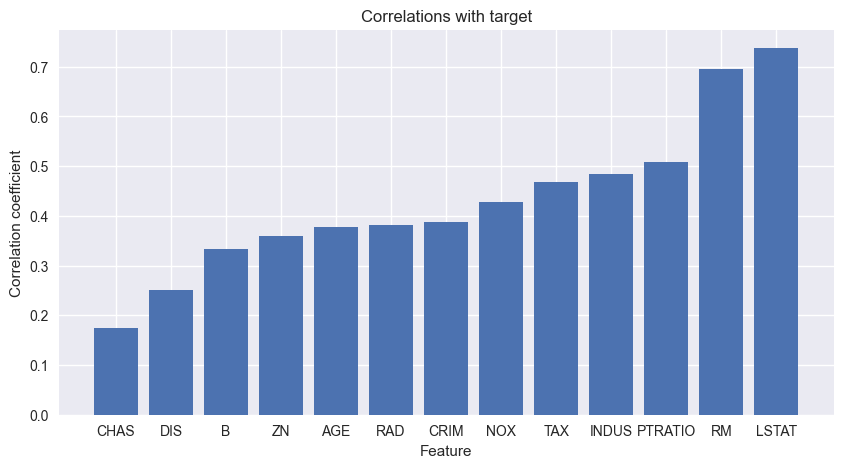

In [24]:
#Вычисляем модуль корреляции
corr_with_target = boston_data.corr()['MEDV'].abs().sort_values()
#Удаляем корреляцию целевой переменной с самой собой
corr_with_target = corr_with_target.drop('MEDV')
#Строим столбчатую диаграмму корреляций
fig, ax = plt.subplots(figsize=(10, 5)) #фигура+координатная плоскость
ax.bar(corr_with_target.index, corr_with_target.values) #столбчатая диаграмма
ax.set_title('Correlations with target') #название графика
ax.set_xlabel('Feature') #название оси x
ax.set_ylabel('Сorrelation coefficient'); #название оси y

>Построить линейную регрессию = обучить линейную регрессию = найти её параметры.

$$ \overline{w} = (X^TX)^{-1}X^Ty = QX^Ty $$

Матрица $X$ - таблица, состоящая из одного столбца (LSTAT), a $y$ - столбец с медианными ценами (MEDV)

In [25]:
X = boston_data[['LSTAT']] #матрица наблюдений
y = boston_data['MEDV'] #вектор правильных ответов
X.head()

,LSTAT
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33


> `@` используется для матричного умножения

In [26]:
def linear_regression(X, y):
    # Создаем вектор из единиц
    ones = np.ones(X.shape[0])
    # Добавляем вектор к таблице первым столбцом
    X = np.column_stack([ones, X])
    # Вычисляем обратную матрицу Q
    Q = np.linalg.inv(X.T @ X)
    # Вычисляем вектор коэффициентов
    w = Q @ X.T @ y
    return w

w = linear_regression(X, y)
print(f'Vector w: {w}')
print(f'w0: {w[0]}')
print(f'w1: {w[1]}')

Vector w: [34.55384088 -0.95004935]
w0: 34.55384087938303
w1: -0.9500493537579884


Итак, мы получили значения коэффициентов уравнения прямой. С точностью до сотых они равны:

$$ w_0 = 34.55 $$
$$ w_1 = -0.95 $$

Модель будет иметь вид:

$$ \widehat{y} = 34.55 - 0.95x $$

Коэффициент $w_0$  имитирует влияние сторонних факторов, которые не учтены в модели. Это значение медианной цены домов на участке, если бы значение процента населения с низким статусом было равно 0. 

Коэффициент $w_1$ означает, на сколько в среднем изменится медианная цена (в тысячах долларов) при увеличении низкостатусного населения на 1 единицу. То есть если количество низкостатусного населения увеличится на 1 %, то медианная цена зданий на участке упадёт на 0.95 тысяч долларов. Можно сказать, что каждый новый процент низкостатусного населения уменьшает медианную цену на 0.95 тысяч долларов.



In [27]:
x_example = 5.18
y_predict = w[0] + w[1] * x_example
print(f'Predicted value: {y_predict}')

Predicted value: 29.632585226916653


Давайте напишем функцию `plot_regression_2d()`, у которой будет три обязательных аргумента (матрица наблюдений $X$, столбец правильных ответов $y$ и столбец с предсказаниями модели `y_pred`) и два аргумента по умолчанию (`xlabel` — подпись оси абсцисс и `ylabel` — подпись оси ординат).



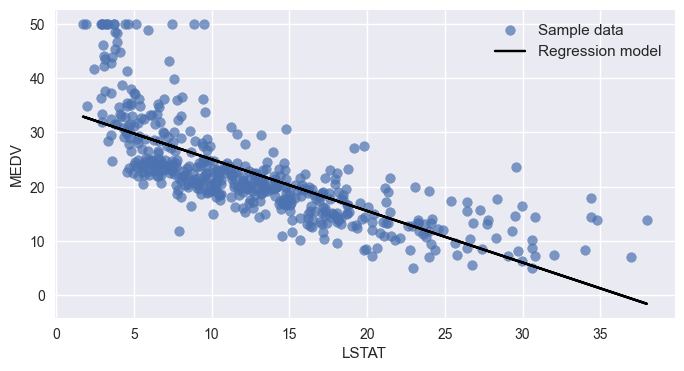

In [28]:
def plot_regression_2d(X, y_true, y_predict, xlabel='LSTAT', ylabel='MEDV'):
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.scatter(X, y_true, alpha=0.7, label='Sample data')
    ax.plot(X, y_predict, color='black', label='Regression model')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(facecolor='white', fontsize=11)

y_predict = w[0] + w[1] * X
plot_regression_2d(X, y, y_predict)

## Аналитическое решение с помощью `sklearn`

In [29]:
from sklearn import linear_model

In [30]:
lr_lstat = linear_model.LinearRegression()
lr_lstat.fit(X, y)

print('w0: {}'.format(lr_lstat.intercept_)) #свободный член w0
print('w1: {}'.format(lr_lstat.coef_)) #остальные параметры модели w1, w2, ..., wm

w0: 34.5538408793831
w1: [-0.95004935]


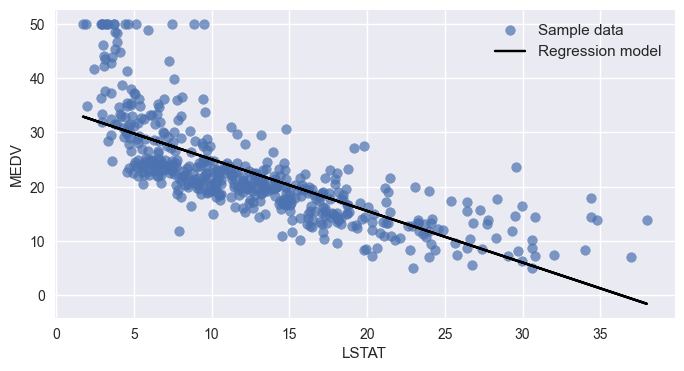

In [31]:
y_predict = lr_lstat.predict(X)
plot_regression_2d(X, y, y_predict)

Используем все признаки для обучения$(X)$, кроме целевого$(y)$.

In [32]:
features = boston_data.drop('MEDV', axis=1).columns
X = boston_data[features]
y = boston_data['MEDV']
lr_full = linear_model.LinearRegression()
lr_full.fit(X, y)

LinearRegression()

In [33]:
#Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({
    'Features': features,
    'Coefficients': lr_full.coef_
})
#Составляем строку таблицы со свободным членом
intercept_df = pd.DataFrame({
    'Features': ['INTERCEPT'],
    'Coefficients': lr_full.intercept_
})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
coef_df

,Features,Coefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


Итак, мы с вами построили две модели линейной регрессии: `lr_lstat` на одном признаке (LSTAT) и `lr_full` — на всех признаках в данных. Хотелось бы сравнить эти модели по их качеству. Может, нам достаточно только знаний о проценте низкостатусного населения, чтобы предсказать медианную цену?

Самая простая идея — визуализировать ошибки. Давайте построим коробчатые диаграммы ошибок моделей. Ошибки будем считать по формуле:

$$ error_i = y_i - \widehat{y}_i $$

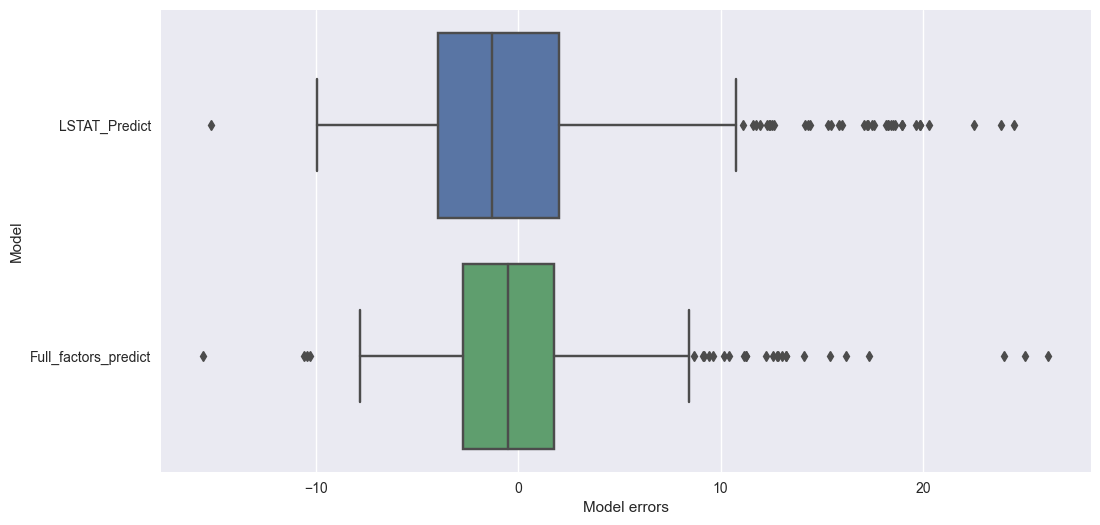

In [34]:
fig, ax = plt.subplots(figsize=(12, 6))
#Ошибки модели на одном факторе LSTAT
y_error_lstat = y - lr_lstat.predict(boston_data[['LSTAT']])
#Ошибки модели на всех факторах
y_errors_full = y - lr_full.predict(boston_data[features])
errors_df = pd.DataFrame({
    'LSTAT_Predict': y_error_lstat,
    'Full_factors_predict': y_errors_full
})
sns.boxplot(data=errors_df, orient='h', ax=ax)
ax.set_xlabel('Model errors')
ax.set_ylabel('Model');

In [35]:
X_2_7 = pd.DataFrame({
    'CRIM': 0.35114,
    'ZN': 0.00000,
    'INDUS': 7.38000,
    'CHAS': 0.00000,
    'NOX': 0.49300,
    'RM': 6.04100,
    'AGE': 49.90000,
    'DIS': 4.72110,
    'RAD': 5.00000,
    'TAX': 287.00000,
    'PTRATIO': 19.60000,
    'B': 396.90000,
    'LSTAT': 7.70000    
}, index=[0])
lr_full.predict(X_2_7)

array([22.86952447])

In [36]:
startups = pd.read_csv('data/50_Startups.zip')
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


* R&D Spend — расходы на исследования.
* Administration — административные расходы.
* Marketing Spend — расходы на маркетинг.
* State — штат.
* Profit — прибыль (целевой признак).

In [37]:
# X = startups[['R&D Spend', 'Administration', 'Marketing Spend']]
# y = startups['Profit']

# w = linear_regression(X, y).round(2)
# print(f'w0 = {w[0]}')
# print(f'w1(R&D Spend) = {w[1]}')
# print(f'w2(Administration) = {w[2]}')
# print(f'w2(Marketing Spend) = {w[3]}')

# <center>Расчёт метрик</center>

In [38]:
from sklearn import metrics

In [41]:
y_predict_lstat = lr_lstat.predict(boston_data[['LSTAT']])
print('MAE score:', metrics.mean_absolute_error(y, y_predict_lstat), 'thousand $')
print('RMSE score:', np.sqrt(metrics.mean_squared_error(y, y_predict_lstat)), 'thousand $')
print('MAPE score:', metrics.mean_absolute_percentage_error(y, y_predict_lstat) * 100, '%')
print('R2 score:', metrics.r2_score(y, y_predict_lstat))

MAE score: 4.505281166250568 thousand $
RMSE score: 6.20346413142642 thousand $
MAPE score: 21.352076008722683 %
R2 score: 0.5441462975864797


In [42]:
y_predict_full = lr_full.predict(boston_data[features])
print('MAE score:', metrics.mean_absolute_error(y, y_predict_full), 'thousand $')
print('RMSE score:', np.sqrt(metrics.mean_squared_error(y, y_predict_full)), 'thousand $')
print('MAPE score:', metrics.mean_absolute_percentage_error(y, y_predict_full) * 100, '%')
print('R2 score:', metrics.r2_score(y, y_predict_full))

MAE score: 3.270862810900315 thousand $
RMSE score: 4.679191295697282 thousand $
MAPE score: 16.41729880648999 %
R2 score: 0.7406426641094094


In [45]:
#3.2
y_true = [1.23, 2.35, 2.75]
y_pred = [1.01, 12.3, 2.74]
print('RMSE score:', np.round(np.sqrt(metrics.mean_squared_error(y_true, y_pred)), 2), 'thousand $')

RMSE score: 5.75 thousand $


In [47]:
#3.3
y_true = [22.4, 20.6, 23.9, 22.0, 11.9]
y_pred = [20.5, 20.2, 20.3, 19.0, 11.0]
print('R2 score:', np.round(metrics.r2_score(y_true, y_pred), 2))

R2 score: 0.71


# <center>Недостатки МНК(OLS)</center>

> <font color=lightpink>Оказывается, у такого простого подхода есть один большой минус — это работа с большим количеством признаков.</font>

$ Q = (X^TX)^{-1} $ имеет кубическую сложность. Для матрицы $(m, m)$ понадобится $m^3$ операций.

> <font color=lightpink>Второй недостаток МНК — это невозможность инкрементального обучения, или обучения в режиме реального времени.</font>

Если мы используем метод `fit()` для модели `LinearRegression` и передадим в него новые данные, то коэффициенты модели будут рассчитаны по новым данным, а прошлые наблюдения будут забыты. То есть придётся добавлять данные в таблицу и переобучать модель на всех доступных данных ещё раз.